## Model Developed on 12/07/2016
### Initial Model showing Respiration in Skeletal Muscle Cell and its Electrical Equivalent:

<img src="schem.png">

In [48]:
%%latex
$i_c = i_1 + i_2 -------(1)$
$$  $$
$i_1 = \frac{(E_u-E_1)}{R_u} -------- (2)$
$$  $$
$E_1 = \frac{1}{c}q_c$
$$  $$
$i_c = \frac{E_u}{R_u} - \frac{1}{R_uC}q_c-i_y(t)$
$$  $$
$\frac{dq_c}{dt} = -\frac{1}{R_uC}q + \frac {E_u(t)}{R_u} - i_y(t)$
$$  $$
$q_c$ = Amount of Oxygen in Myoglobin... The one that we measure using the BSX Sensor.
$$  $$
$VO_2 = HR * SpO_2$

<IPython.core.display.Latex object>

In [52]:
%%latex
Why is  $E_u = O_h#C_{Hemoglobin}$?
$$ $$
Is $C_{Hemoglobin}$ actually the Pulse Oximeter reading?
$$ $$
We know that $C=\frac{q_c}{V}$.
Why is $C =\frac{q_c}{C_{Hemoglobin}}$?

<IPython.core.display.Latex object>

%%latex
$M_m$ = Myoglobin quantity
$$ $$
$M_o$ = Oxygen quantity bound to Myoglobin
$$ $$
Oxygen in Myoglobin = $O_m = \frac{M_o}{M_m}$


# New Model Developed on 12/09/2016:

<img src="schem_a.png">

### Description: 

The oxygen transport from Hemoglobin to myoglobin and sarcoplasm is modeled as a bi-compartmental structure. The following equations describe the transport behavior mathematically.

In [157]:
%%latex
Oxygen concentration in Myoglobin is $O_{Myo} = \frac {M_{O2-Myo}}{M_{Myo}}$ $$ $$
Oxygen concentration in hemoglobin is $O_{Hb} = \frac {M_{O2-Hb}}{M_{Hb}}$ $$ $$
Flux of Oxygen from Hemoglobin to Myoglobin is $f_i = D * [O_{Hb} - O_{Myo}]$ $$ $$
Where, D is a conductance equivalent for fluid dynamics and is equal to $ D = \frac {k}{\mu}$ 
where k = permeability and $\mu = viscocity $ $$ $$
$\frac{dM_{O2-Myo}}{dt} = D * [\frac {M_{O2-Hb}}{M_{Hb}} - \frac {M_{O2-Myo}}{M_{Myo}}] - f_o $ $$ $$

<IPython.core.display.Latex object>

### Following is the code I have written in Python. 
I am trying to use hypothetical values of the parameters such as oxygen concentrations in hemoglobin and myoglobin to see what waveforms I get. However, I think that the model may not be adequately defined. We are not using any parameters other than oxygen concentrations in hemoglobin (measured by the pulse oximeter) and in myoglobin (measured by the BSX sensor). 

Is there a way we can use the **heart rate** data and **speed** (or power) in our model? I understand that heart rate and speed are both reflected in the **SmO2** reading.

Total cells that had NaNs were 0 out of  129600 elements.


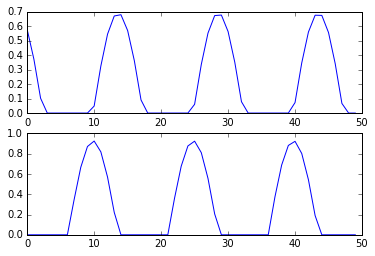

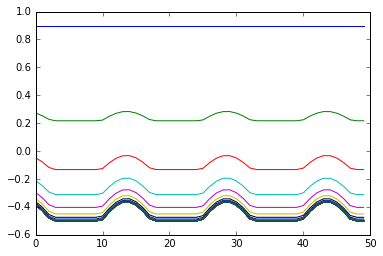

In [154]:
%matplotlib inline
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import random

pi = np.pi
sqrt = np.sqrt
cos = np.cos
sin = np.sin
# Following parameters will be used to create sinusoidal-like signals as hypothetical signals for input parameters.
samp_f = 100
freq = 72
t = np.linspace(0,120,freq*5)
wt = 2*pi*freq*t #np.linspace(0,1,samp_f)

#Following function removes sets the negatives values of any given signal to zero.
def signal_clipper (signal):
    for i in range(len(signal)):
        if (signal[i]<=0):
            signal[i] = 0
        else:
            signal[i] = signal[i]
    return signal

M_Hb= 10  # mg/dl - an arbitrary value 
M_O2Hb= signal_clipper(random.random()*sin(wt)) # random signal
M_Myo = 2 # mg/dl - an arbitrary value
M_O2Myo = signal_clipper(random.random()*cos(wt)) # random signal
D = 4 #signal_clipper(random.random()*cos(wt)) # random signal
fo = 1 # A random constant value for out-flux.

# Following is the actual differential equation.
def o2transport (M_O2Myo,t):
    dmo2dt = -D*(M_O2Myo/M_Myo) + D*(M_O2Hb/M_Hb) - fo
    return dmo2dt

zinit = [0.9]*len(M_O2Hb) # Initial condition.
z = integrate.odeint(o2transport,zinit,t)  # Actual ODE Solver
print "Number of cells that had NaNs were", np.isnan(z).sum(),"out of ",z.size,"elements."  
z = np.nan_to_num(z)

# Plot containing subplots showing the input signals such as values of M_O2Myo, M_Myo, M_O2Hb, and M_Hb.
plt.figure()

plt.subplot (211)
plt.plot (M_O2Hb[50:100])
plt.subplot (212)
plt.plot (M_O2Myo[50:100])

# Plot of a small portion of the output signal M_O2-Myo. This should look like the waveform
# we get from the BSX sensor. 
plt.figure()  
for i in range (0,freq,1):
    plt.plot(z[i,50:100])

# plt.figure()
# plt.plot (t,z[20])

